In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
df.shape

(768, 9)

In [10]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,np.NaN)

In [11]:
#Eksik Değerlerin Doldurulması İşlemi
df.fillna(df.mean(),inplace=True)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [15]:
#Analysis of Corr
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [16]:
import seaborn as sns

<AxesSubplot:>

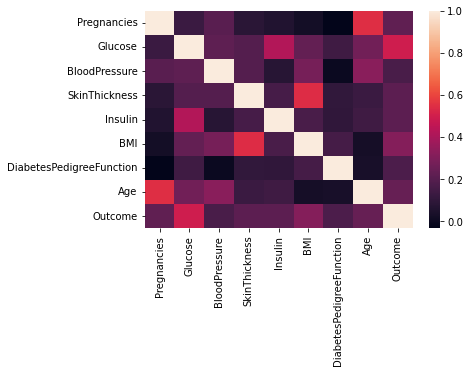

In [17]:
sns.heatmap(df.corr())

In [18]:
df.corr().nlargest(4,"Outcome").index

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')

In [19]:
'''Alghorithms:
1.Logistic Regression
2.Support Vector Regression
'''

'Alghorithms:\n1.Logistic Regression\n2.Support Vector Regression\n'

In [20]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [21]:
x = df[["Glucose","BMI","Age"]]
y = df.iloc[:,8]

In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
log_reg = linear_model.LogisticRegression()

In [24]:
log_reg_score = cross_val_score(log_reg,x,y,cv = 10,scoring="accuracy").mean()

In [25]:
log_reg_score

0.7669856459330144

In [26]:
results =[]
results.append(log_reg_score)

In [27]:
results

[0.7669856459330144]

In [28]:
from sklearn import svm

In [29]:
linear_svm = svm.SVC(kernel="linear")

In [30]:
linear_svm_score = cross_val_score(linear_svm,x,y,cv=10,scoring="accuracy").mean()

In [31]:
linear_svm_score

0.7656527682843473

In [32]:
results.append(linear_svm_score)

In [33]:
results

[0.7669856459330144, 0.7656527682843473]

In [34]:
import pickle

In [35]:
filename = "diabetes.sav"

In [36]:
log_reg.fit(x,y)
pickle.dump(log_reg,open(filename,"wb")) #wb = write binary

In [37]:
#Modelin Çağırılması
loaded_model = pickle.load(open(filename,"rb"))#rb= read binary

In [38]:
loaded_model

LogisticRegression()

In [39]:
glucose = 125
BMI = 40
Age = 50
prediction = loaded_model.predict([[glucose,BMI,Age]])

C:\Users\serha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
prediction

array([1], dtype=int64)

In [41]:
glucose1 = 107
BMI1 = 26.8
Age1 = 28
prediction1 = loaded_model.predict([[glucose1,BMI1,Age1]])

C:\Users\serha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
prediction1

array([0], dtype=int64)